In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from my_utils import plot_image, load_model, process_frame_and_annotate, live_camera
import cv2
%matplotlib inline

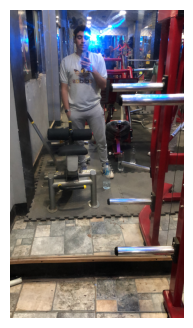

In [3]:
frame = cv2.imread('1.jpeg')
plot_image(frame, 4)

In [4]:
POSE_MODEL_WEIGHTS_PATH = "yolov7-w6-pose.pt"
pose_model = load_model(POSE_MODEL_WEIGHTS_PATH)

/home/moaz/anaconda3/envs/yolov7/lib/python3.8/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


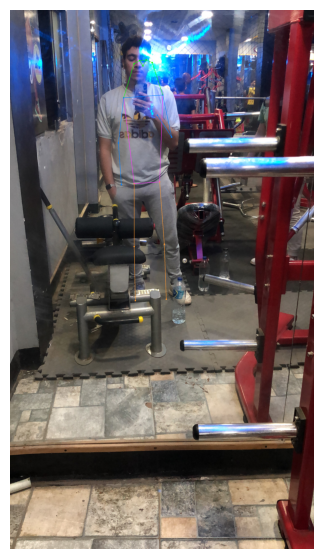

In [5]:
annoted_frame = process_frame_and_annotate(pose_model, frame)
plot_image(annoted_frame, 7)

In [6]:
from functools import partial

annotator = partial(process_frame_and_annotate, pose_model)

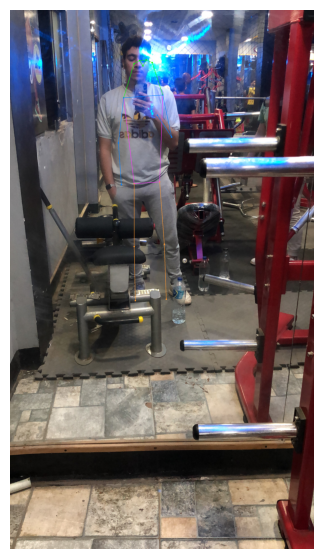

In [7]:
annotated = annotator(frame)
plot_image(annotated, 7)

In [8]:
live_camera(annotator)

### Getting joints and angels 

In [9]:
from my_utils import pose_pre_process_frame, pose_post_process_output, pose_annotate
import torch

POSE_IMAGE_SIZE = 256
STRIDE = 64
CONFIDENCE_THRESHOLD = 0.25
IOU_THRESHOLD = 0.65

In [43]:
frame = cv2.imread('2.png')

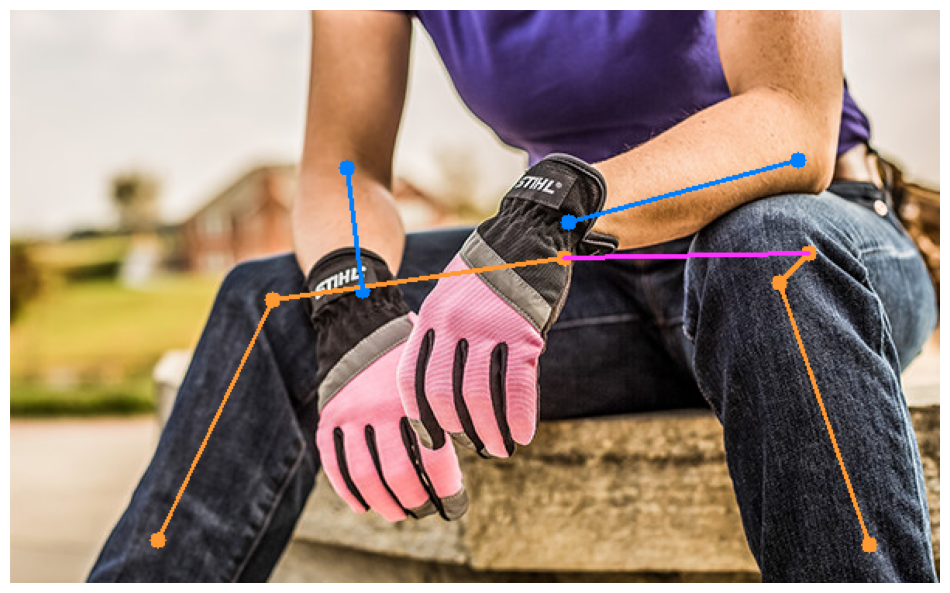

In [44]:
pose_pre_processed_frame = pose_pre_process_frame(frame=frame.copy())

image_size = frame.shape[:2]
scaled_image_size = tuple(pose_pre_processed_frame.size())[2:]

with torch.no_grad():
    pose_output, _ = pose_model(pose_pre_processed_frame)
    pose_output = pose_post_process_output(
        model=pose_model,
        output=pose_output,
        confidence_threshold=CONFIDENCE_THRESHOLD,
        iou_threshold=IOU_THRESHOLD,
        image_size=image_size,
        scaled_image_size=scaled_image_size
    )

annotated_frame = pose_annotate(image=frame, detections=pose_output)
plot_image(annotated_frame)

In [45]:
pose_output[0]

array([          0,           0,         137,      95.375,       236.5,         154,     0.92866,      321.68,      128.39,    0.075439,      338.96,      127.31,    0.054413,      302.34,      129.48,    0.067078,      378.81,       120.5,    0.071838,      275.98,      123.57,    0.034424,      463.48,      51.188,
           0.28296,      249.32,      58.174,     0.35864,      508.89,      97.318,     0.86768,      217.09,      102.86,     0.85889,      360.94,      137.06,     0.93701,      227.93,      181.39,     0.92188,      515.04,      157.06,     0.91406,      357.42,      160.19,     0.92725,      496.29,      176.09,
           0.84766,      169.19,      187.41,     0.85059,       554.3,      345.19,      0.5083,      95.068,       342.3,     0.51416])

In [46]:
pose_output.shape

(1, 58)

In [47]:
len(pose_output[0, 7:]) / 3

17.0

In [48]:
kpts = pose_output[0, 7:].T; kpts

array([     321.68,      128.39,    0.075439,      338.96,      127.31,    0.054413,      302.34,      129.48,    0.067078,      378.81,       120.5,    0.071838,      275.98,      123.57,    0.034424,      463.48,      51.188,     0.28296,      249.32,      58.174,     0.35864,      508.89,      97.318,     0.86768,
            217.09,      102.86,     0.85889,      360.94,      137.06,     0.93701,      227.93,      181.39,     0.92188,      515.04,      157.06,     0.91406,      357.42,      160.19,     0.92725,      496.29,      176.09,     0.84766,      169.19,      187.41,     0.85059,       554.3,      345.19,      0.5083,
            95.068,       342.3,     0.51416])

In [49]:
coord = []
no_kpt = len(kpts)//3
for i in range(no_kpt):
    cx_cy = kpts[3*i], kpts[3*i + 1]
    conf = kpts[3*i + 2]
    coord.append([i, cx_cy, conf])

In [50]:
coord

[[0, (321.6796875, 128.39192708333331), 0.075439453125],
 [1, (338.96484375, 127.30794270833333), 0.054412841796875],
 [2, (302.34375, 129.47591145833331), 0.06707763671875],
 [3, (378.80859375, 120.5029296875), 0.07183837890625],
 [4, (275.9765625, 123.57421875), 0.034423828125],
 [5, (463.4765625, 51.188151041666664), 0.282958984375],
 [6, (249.31640625, 58.173828125), 0.358642578125],
 [7, (508.88671875, 97.31770833333333), 0.86767578125],
 [8, (217.08984375, 102.85807291666666), 0.85888671875],
 [9, (360.9375, 137.06380208333331), 0.93701171875],
 [10, (227.9296875, 181.38671875), 0.921875],
 [11, (515.0390625, 157.05729166666666), 0.9140625],
 [12, (357.421875, 160.18880208333331), 0.92724609375],
 [13, (496.2890625, 176.08723958333331), 0.84765625],
 [14, (169.189453125, 187.40885416666666), 0.8505859375],
 [15, (554.296875, 345.1888020833333), 0.50830078125],
 [16, (95.068359375, 342.2981770833333), 0.51416015625]]

In [58]:
CONFIDENCE_THRESHOLD

0.25

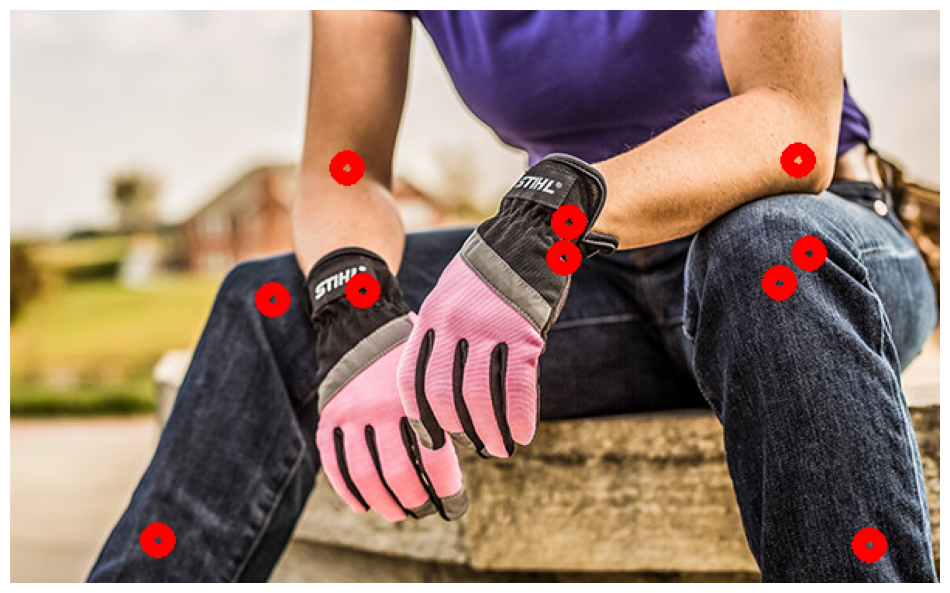

In [61]:
frame = cv2.imread('2.png')
for point in coord:
    if point[2] > .5:
        image = cv2.circle(frame, (int(point[1][0]), int(point[1][1])), radius=7, color=(0, 0, 255), thickness=7)
plot_image(frame)